# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

## Inicialización

Para realizar un oportuno análisis de los datos proporcionados, primero deberemos identificar los "errores" que estén en cada uno de los dataframes. Necesitaremos convertir todo dato que sea materia prima para futuros cálculos en el tipo "int" y las fechas a "datetime". Esto permitirá el flujo de trabajo en las futuras líneas que requieran cálculos matemáticos o agrupaciones.

Para lograr, en la parte final de este proyecto, analizar estadísticamente la información, deberemos entender los resultados de nuestro primer análisis. A través de recursos gráficos como histogramas, gráficas y gráficas de caja, podremos diseñar un experimento que nos permita justificar la hipótesis que seleccionemos.



In [163]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math as mt 
from math import factorial
import seaborn as sns
from scipy import stats

## Cargar datos

In [2]:
calls= pd.read_csv("/datasets/megaline_calls.csv") 
internet= pd.read_csv("/datasets/megaline_internet.csv")
messages=pd.read_csv("/datasets/megaline_messages.csv") 
plans=pd.read_csv("/datasets/megaline_plans.csv") 
users=pd.read_csv("/datasets/megaline_users.csv")


## Preparar los datos

## Tarifas

In [3]:
print(plans.head().info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None


In [66]:
print(plans.head())

   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10             0.03            0.03      surf  
1               70           7             0.01            0.01  ultimate  


Para este primer vistazo parece que no requerimos algun ajuste

## Corregir datos

## Enriquecer los datos

## Usuarios/as

In [5]:
print(users.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


In [6]:
print(users.head())

   user_id first_name  last_name  age                                   city  \
0     1000   Anamaria      Bauer   45  Atlanta-Sandy Springs-Roswell, GA MSA   
1     1001     Mickey  Wilkerson   28        Seattle-Tacoma-Bellevue, WA MSA   
2     1002     Carlee    Hoffman   36   Las Vegas-Henderson-Paradise, NV MSA   
3     1003   Reynaldo    Jenkins   52                          Tulsa, OK MSA   
4     1004    Leonila   Thompson   40        Seattle-Tacoma-Bellevue, WA MSA   

     reg_date      plan churn_date  
0  2018-12-24  ultimate        NaN  
1  2018-08-13      surf        NaN  
2  2018-10-21      surf        NaN  
3  2018-01-28      surf        NaN  
4  2018-05-23      surf        NaN  


Basados en el diccionario de datos "churn_date" hace refencia a la fecha en que se dejo el servicio, podemos sustituir el valor "NaN" por "0" para futuros calculos 

### Corregir los datos

In [7]:
users["churn_date"]=users["churn_date"].fillna(0)
print(users.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None


### Enriquecer los datos

## Llamadas

In [8]:
print(calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB
None


In [9]:
print(calls.head())

         id  user_id   call_date  duration
0   1000_93     1000  2018-12-27      8.52
1  1000_145     1000  2018-12-27     13.66
2  1000_247     1000  2018-12-27     14.48
3  1000_309     1000  2018-12-28      5.76
4  1000_380     1000  2018-12-30      4.22


Basados en la primera observacion podemos necesitar los datos relacionados a fechas en formato "datetime", esto nos permitira su uso con los metodos correspondientes mas adelante 

### Corregir los datos

In [10]:
calls["call_date"] = pd.to_datetime(calls["call_date"], format="%Y-%m-%d")
print(calls.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB
None


### Enriquecer los datos

In [34]:
calls["call_date"] = pd.to_datetime(calls["call_date"])
calls["month"] = calls["call_date"].dt.to_period("M")

## Mensajes

In [11]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes
print(messages.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB
None


In [12]:
# Imprime una muestra de datos para los mensajes

print(messages.head())

         id  user_id message_date
0  1000_125     1000   2018-12-27
1  1000_160     1000   2018-12-31
2  1000_223     1000   2018-12-31
3  1000_251     1000   2018-12-27
4  1000_255     1000   2018-12-26


Basados en la primera observacion podemos necesitar los datos relacionados a fechas en formato "datetime", esto nos permitira su uso con los metodos correspondientes mas adelante 

### Corregir los datos

In [110]:
messages["message_date"] = pd.to_datetime(messages["message_date"], format="%Y-%m-%d")


### Enriquecer los datos

In [112]:

messages["month"] = pd.to_datetime(messages["message_date"]).dt.to_period("M")
messages_per_month = (
    messages.groupby(["user_id", "month"])
    .size()
    .reset_index(name="messages_count")
)

print(messages_per_month.head())

   user_id    month  messages_count
0     1000  2018-12              11
1     1001  2018-08              30
2     1001  2018-09              44
3     1001  2018-10              53
4     1001  2018-11              36


## Internet

In [113]:
# Imprime la información general/resumida sobre el DataFrame de internet

print(internet.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91078 entries, 0 to 104824
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            91078 non-null  object        
 1   user_id       91078 non-null  int64         
 2   session_date  91078 non-null  datetime64[ns]
 3   mb_used       91078 non-null  float64       
 4   usage_mb      91078 non-null  float64       
 5   month         91078 non-null  period[M]     
dtypes: datetime64[ns](1), float64(2), int64(1), object(1), period[M](1)
memory usage: 6.9+ MB
None


In [114]:
# Imprime una muestra de datos para el tráfico de internet

print(internet.head())

         id  user_id session_date  mb_used  usage_mb    month
0   1000_13     1000   2018-12-29    89.86      90.0  2018-12
2  1000_379     1000   2018-12-28   660.40     661.0  2018-12
3  1000_413     1000   2018-12-26   270.99     271.0  2018-12
4  1000_442     1000   2018-12-27   880.22     881.0  2018-12
5    1001_0     1001   2018-08-24   284.68     285.0  2018-08


Basados en la primera observacion podemos necesitar los datos relacionados a fechas en formato "datetime", esto nos permitira su uso con los metodos correspondientes mas adelante 

### Corregir los datos

In [115]:
internet["session_date"] = pd.to_datetime(internet["session_date"], format="%Y-%m-%d")


### Enriquecer los datos

In [178]:
internet = internet[internet["mb_used"] > 0]
internet["mb_used"] = pd.to_numeric(internet["mb_used"], errors="coerce")
# Regla 1: Todo consumo menor a 1 MB se convierte en 1 MB
internet["mb_used"] = np.where(internet["mb_used"] < 1, 1, internet["mb_used"])

# Regla 2: Redondeo hacia arriba para valores decimales
internet["usage_mb"] = np.ceil(internet["mb_used"])
internet = internet.dropna(subset=["user_id", "mb_used"])
internet["month"] = internet["session_date"].dt.to_period("M")
internet["usage_mb"] = np.ceil(internet["usage_mb"])
print(internet.head())


         id  user_id session_date  mb_used  usage_mb    month
0   1000_13     1000   2018-12-29    89.86      90.0  2018-12
2  1000_379     1000   2018-12-28   660.40     661.0  2018-12
3  1000_413     1000   2018-12-26   270.99     271.0  2018-12
4  1000_442     1000   2018-12-27   880.22     881.0  2018-12
5    1001_0     1001   2018-08-24   284.68     285.0  2018-08


## Estudiar las condiciones de las tarifas

In [117]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras

print(plans.info())
print(plans.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes
None
   messages_included  mb_per_month_included  minutes_included  \
0                 50                  15360               500   
1               1000                  30720              3000   

   usd_monthly_pay  usd_per_gb  usd_per_message  usd_per_minute plan_name  
0               20          10      

## Agregar datos por usuario


In [118]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.

calls_per_month = calls.groupby(["user_id", "call_date"]).agg({'duration': 'sum'}).reset_index()
calls_per_month.rename(columns={'duration': 'total_minutes'}, inplace=True)
calls_per_month['month'] = pd.to_datetime(calls_per_month['call_date']).dt.to_period('M')
print(calls_per_month.head())

   user_id  call_date  total_minutes    month
0     1000 2018-12-26          14.36  2018-12
1     1000 2018-12-27          48.26  2018-12
2     1000 2018-12-28          29.00  2018-12
3     1000 2018-12-29           1.70  2018-12
4     1000 2018-12-30           4.22  2018-12


In [119]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.

user_call_summary_by_date = (
    calls.groupby(["user_id", "call_date"])
    .agg(total_minutes=("duration", "sum"))
    .reset_index()
)
user_call_summary_by_date['month'] = pd.to_datetime(user_call_summary_by_date['call_date']).dt.to_period('M')
print(user_call_summary_by_date.head())

   user_id  call_date  total_minutes    month
0     1000 2018-12-26          14.36  2018-12
1     1000 2018-12-27          48.26  2018-12
2     1000 2018-12-28          29.00  2018-12
3     1000 2018-12-29           1.70  2018-12
4     1000 2018-12-30           4.22  2018-12


In [130]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.



messages["month"] = pd.to_datetime(messages["message_date"]).dt.to_period("M")
messages_per_month = (
    messages.groupby(["user_id", "month"])
    .size()
    .reset_index(name="messages_count")
)

print(messages_per_month.head())

   user_id    month  messages_count
0     1000  2018-12              11
1     1001  2018-08              30
2     1001  2018-09              44
3     1001  2018-10              53
4     1001  2018-11              36


In [131]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.


internet_per_month = internet.groupby(["user_id", "session_date"]).agg({'usage_mb': 'sum'}).reset_index()
internet_per_month['month'] = pd.to_datetime(internet_per_month['session_date']).dt.to_period('M')
print(internet_per_month.head())


   user_id session_date  usage_mb    month
0     1000   2018-12-26     271.0  2018-12
1     1000   2018-12-27     881.0  2018-12
2     1000   2018-12-28     661.0  2018-12
3     1000   2018-12-29      90.0  2018-12
4     1001   2018-08-15     211.0  2018-08


In [132]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
summary_per_month = calls_per_month.merge(
    messages_per_month, on=["user_id", "month"], how="outer"
).merge(
    internet_per_month, on=["user_id", "month"], how="outer"
)
summary_per_month.fillna(0, inplace=True)
print(summary_per_month.head())


   user_id            call_date  total_minutes    month  messages_count  \
0     1000  2018-12-26 00:00:00          14.36  2018-12            11.0   
1     1000  2018-12-26 00:00:00          14.36  2018-12            11.0   
2     1000  2018-12-26 00:00:00          14.36  2018-12            11.0   
3     1000  2018-12-26 00:00:00          14.36  2018-12            11.0   
4     1000  2018-12-27 00:00:00          48.26  2018-12            11.0   

          session_date  usage_mb  
0  2018-12-26 00:00:00     271.0  
1  2018-12-27 00:00:00     881.0  
2  2018-12-28 00:00:00     661.0  
3  2018-12-29 00:00:00      90.0  
4  2018-12-26 00:00:00     271.0  


In [168]:
users['churn_date'] = users['churn_date'].replace(0, pd.NaT)
monthly_summary = summary_per_month.groupby(['user_id', 'month']).agg(
    total_minutes=('total_minutes', 'sum'),
    messages_count=('messages_count', 'sum'),
    usage_mb=('usage_mb', 'sum')
).reset_index()
summary_with_users = monthly_summary.merge(
    users[['user_id', 'plan', 'churn_date',"city"]], on='user_id', how='left'
)
summary_with_users.rename(columns={'plan': 'plan_name'}, inplace=True)
summary_with_plans = summary_with_users.merge(plans, on='plan_name', how='left')
summary_with_plans['extra_minutes'] = (
    summary_with_plans['total_minutes'] - summary_with_plans['minutes_included']
).clip(lower=0)

summary_with_plans['extra_messages'] = (
    summary_with_plans['messages_count'] - summary_with_plans['messages_included']
).clip(lower=0)

summary_with_plans['extra_mb'] = (
    summary_with_plans['usage_mb'] - summary_with_plans['mb_per_month_included']
).clip(lower=0)
summary_with_plans['extra_minute_cost'] = summary_with_plans['extra_minutes'] * summary_with_plans['usd_per_minute']
summary_with_plans['extra_message_cost'] = summary_with_plans['extra_messages'] * summary_with_plans['usd_per_message']
summary_with_plans['extra_mb_cost'] = (summary_with_plans['extra_mb'] / 1024) * summary_with_plans['usd_per_gb']
active_users_summary = summary_with_plans[summary_with_plans['churn_date'].isna()]
print("\nResumen final de usuarios activos:")
print(active_users_summary[['user_id', 'plan_name', 'total_minutes', 'messages_count', 
                            'usage_mb',"city"]].head())



Resumen final de usuarios activos:
   user_id plan_name  total_minutes  messages_count  usage_mb  \
0     1000  ultimate         467.32           264.0   11418.0   
1     1001      surf        2395.96          5880.0   97006.0   
2     1001      surf        6549.18         25168.0  346658.0   
3     1001      surf        8978.64         29256.0  514188.0   
4     1001      surf       10923.93         27216.0  518672.0   

                                    city  
0  Atlanta-Sandy Springs-Roswell, GA MSA  
1        Seattle-Tacoma-Bellevue, WA MSA  
2        Seattle-Tacoma-Bellevue, WA MSA  
3        Seattle-Tacoma-Bellevue, WA MSA  
4        Seattle-Tacoma-Bellevue, WA MSA  


In [134]:
summary_with_plans['total_minutes'] = summary_with_plans['total_minutes'].fillna(0)
summary_with_plans['messages_count'] = summary_with_plans['messages_count'].fillna(0)
summary_with_plans['usage_mb'] = summary_with_plans['usage_mb'].fillna(0)
summary_with_plans['extra_minutes'] = (
    summary_with_plans['total_minutes'] - summary_with_plans['minutes_included']
).clip(lower=0)

summary_with_plans['extra_messages'] = (
    summary_with_plans['messages_count'] - summary_with_plans['messages_included']
).clip(lower=0)

summary_with_plans['extra_mb'] = (
    summary_with_plans['usage_mb'] - summary_with_plans['mb_per_month_included']
).clip(lower=0)
summary_with_plans['extra_minute_cost'] = summary_with_plans['extra_minutes'] * summary_with_plans['usd_per_minute']
summary_with_plans['extra_message_cost'] = summary_with_plans['extra_messages'] * summary_with_plans['usd_per_message']
summary_with_plans['extra_mb_cost'] = (summary_with_plans['extra_mb'] / 1024) * summary_with_plans['usd_per_gb']
summary_with_plans['total_monthly_cost'] = (
    summary_with_plans['usd_monthly_pay'] +
    summary_with_plans['extra_minute_cost'] +
    summary_with_plans['extra_message_cost'] +
    summary_with_plans['extra_mb_cost']
)
monthly_revenue = summary_with_plans.groupby(['user_id', 'month']).agg(
    total_income=('total_monthly_cost', 'sum')
).reset_index()
print("\nIngresos mensuales por usuario:")
print(monthly_revenue.head())



Ingresos mensuales por usuario:
   user_id    month  total_income
0     1000  2018-12     70.000000
1     1001  2018-08   1049.103019
2     1001  2018-09   4190.347431
3     1001  2018-10   6021.906387
4     1001  2018-11   6062.854150


## Estudia el comportamiento de usuario

### Llamadas

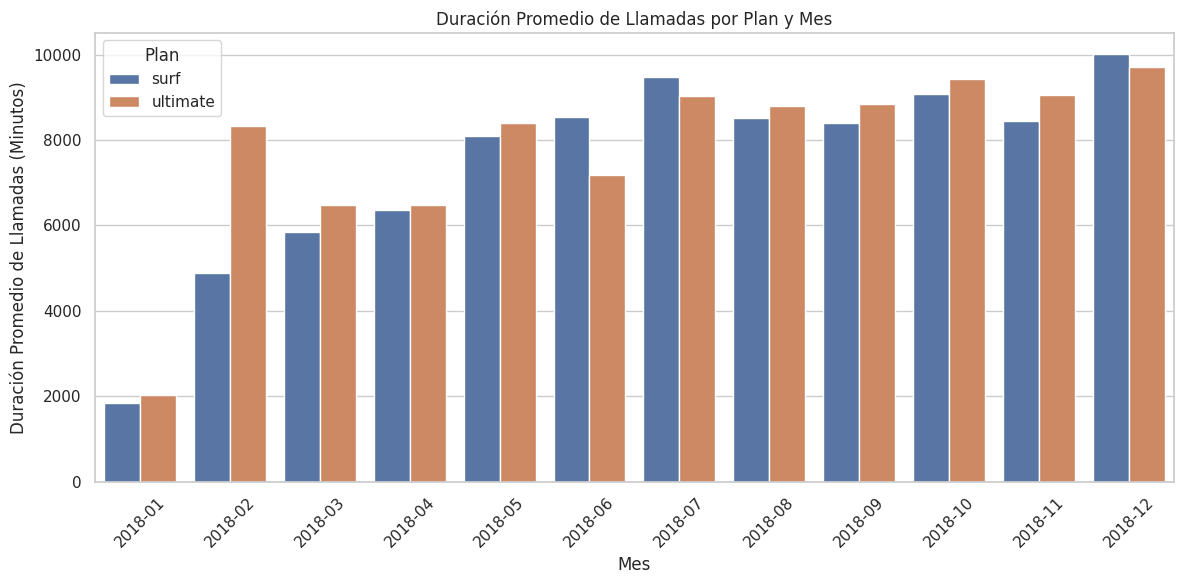

In [135]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
summary_with_plans['total_minutes'] = summary_with_plans['total_minutes'].fillna(0)
avg_call_duration = (
    summary_with_plans.groupby(['month', 'plan_name'])
    .agg(avg_duration=('total_minutes', 'mean'))
    .reset_index()
)
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_call_duration, x='month', y='avg_duration', hue='plan_name')
plt.title('Duración Promedio de Llamadas por Plan y Mes')
plt.xlabel('Mes')
plt.ylabel('Duración Promedio de Llamadas (Minutos)')
plt.xticks(rotation=45) 
plt.legend(title='Plan')
plt.tight_layout() 


plt.show()



No handles with labels found to put in legend.


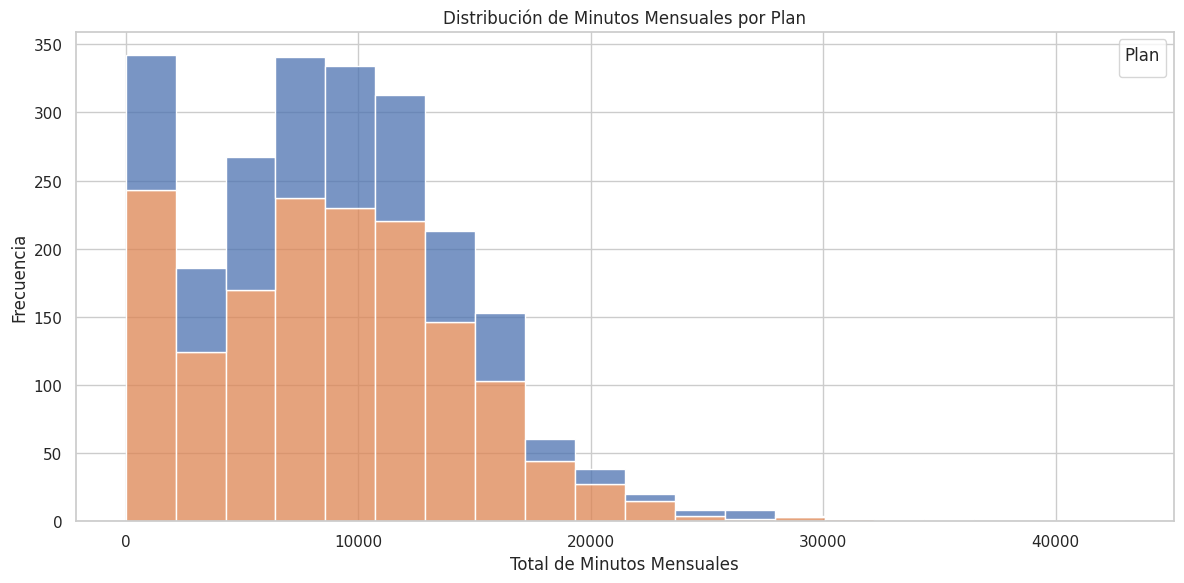

In [180]:

summary_with_plans['total_minutes'] = summary_with_plans['total_minutes'].fillna(0).astype(float)
total_minutes_by_user = (
    summary_with_plans.groupby(['user_id', 'month', 'plan_name'])
    .agg(total_minutes=('total_minutes', 'sum'))
    .reset_index()
)

plt.figure(figsize=(12, 6))
sns.histplot(data=total_minutes_by_user, x='total_minutes', hue='plan_name', multiple='stack', bins=20)
plt.title('Distribución de Minutos Mensuales por Plan')
plt.xlabel('Total de Minutos Mensuales')
plt.ylabel('Frecuencia')
plt.legend(title='Plan')
plt.tight_layout()  


plt.show()


In [137]:
# Calcula la media y la varianza de la duración mensual de llamadas.

summary_stats = (
    summary_with_plans.groupby(['plan_name', 'month'])
    .agg(
        mean_minutes=('total_minutes', 'mean'),    # Media de minutos
        variance_minutes=('total_minutes', 'var')  # Varianza de minutos
    )
    .reset_index()
)
print(summary_stats)


   plan_name    month  mean_minutes  variance_minutes
0       surf  2018-01   1854.165000      2.943636e+06
1       surf  2018-02   4894.748889      1.794289e+07
2       surf  2018-03   5848.999130      2.480407e+07
3       surf  2018-04   6362.896800      2.583495e+07
4       surf  2018-05   8092.510000      3.450323e+07
5       surf  2018-06   8530.759381      2.726521e+07
6       surf  2018-07   9474.572314      3.772018e+07
7       surf  2018-08   8524.342284      3.201508e+07
8       surf  2018-09   8388.653299      2.550171e+07
9       surf  2018-10   9082.904810      3.209633e+07
10      surf  2018-11   8456.026148      2.691171e+07
11      surf  2018-12  10009.015912      3.772451e+07
12  ultimate  2018-01   2035.290000      2.940611e+06
13  ultimate  2018-02   8329.324286      3.961130e+07
14  ultimate  2018-03   6477.123333      3.947058e+07
15  ultimate  2018-04   6488.819524      2.749118e+07
16  ultimate  2018-05   8394.301724      2.742622e+07
17  ultimate  2018-06   7185

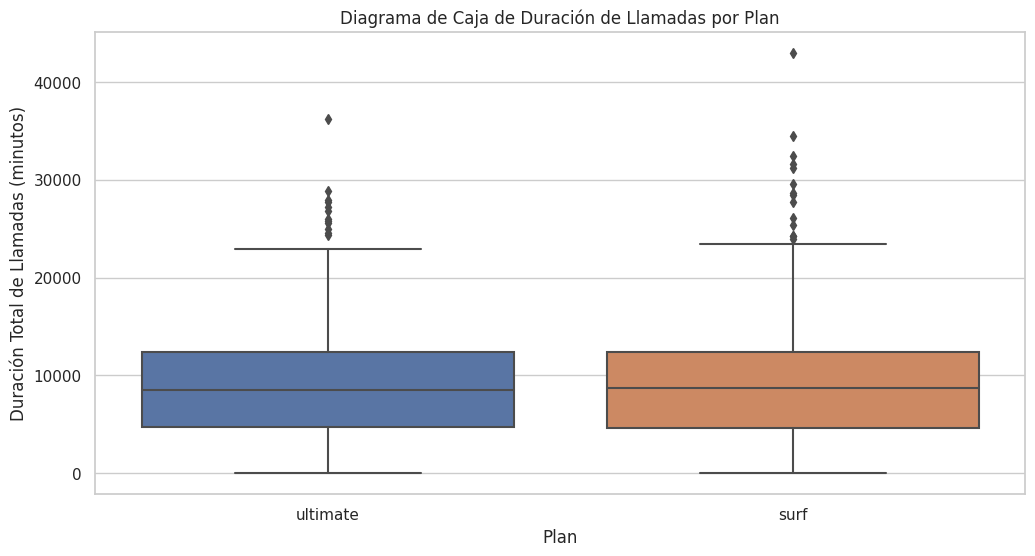

In [138]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas


sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(data=summary_with_plans, x='plan_name', y='total_minutes')
plt.title('Diagrama de Caja de Duración de Llamadas por Plan')
plt.xlabel('Plan')
plt.ylabel('Duración Total de Llamadas (minutos)')

plt.show()


Por lo que podemos obsrvar los usuarios con el plan ultimate tiende a llamas con una mayor duracion 

### Mensajes

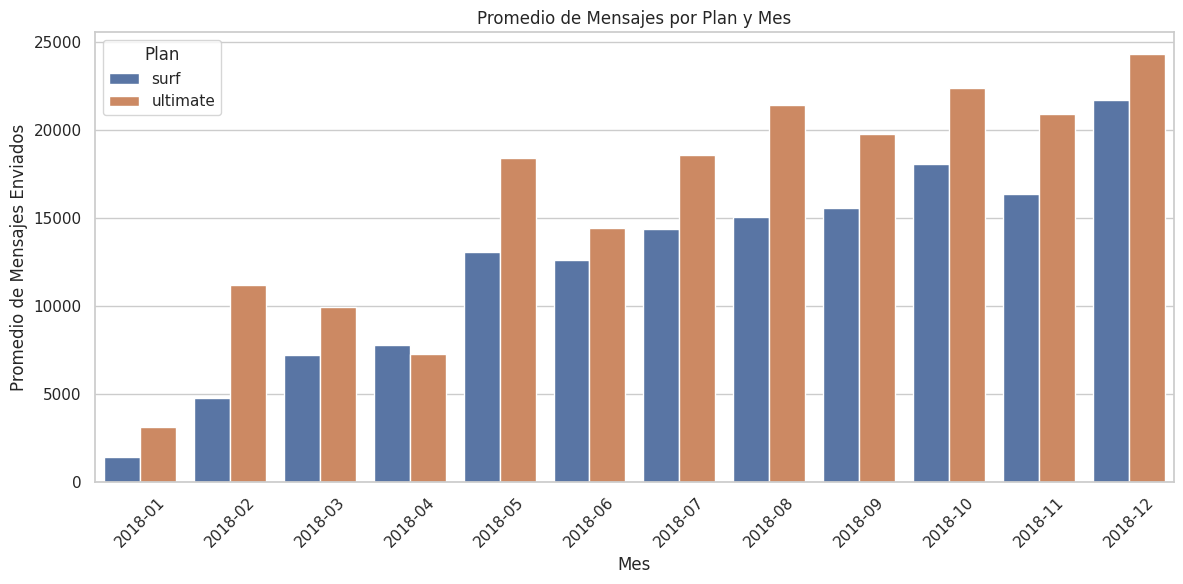

         id  user_id message_date    month
0  1000_125     1000   2018-12-27  2018-12
1  1000_160     1000   2018-12-31  2018-12
2  1000_223     1000   2018-12-31  2018-12
3  1000_251     1000   2018-12-27  2018-12
4  1000_255     1000   2018-12-26  2018-12


In [139]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

summary_with_plans['messages_count'] = summary_with_plans['messages_count'].fillna(0)
avg_messages_count = (
    summary_with_plans.groupby(['month', 'plan_name'])
    .agg(avg_messages=('messages_count', 'mean'))
    .reset_index()
)
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_messages_count, x='month', y='avg_messages', hue='plan_name')
plt.title('Promedio de Mensajes por Plan y Mes')
plt.xlabel('Mes')
plt.ylabel('Promedio de Mensajes Enviados')
plt.xticks(rotation=45) 
plt.legend(title='Plan')
plt.tight_layout() 

plt.show()
print(messages.head())


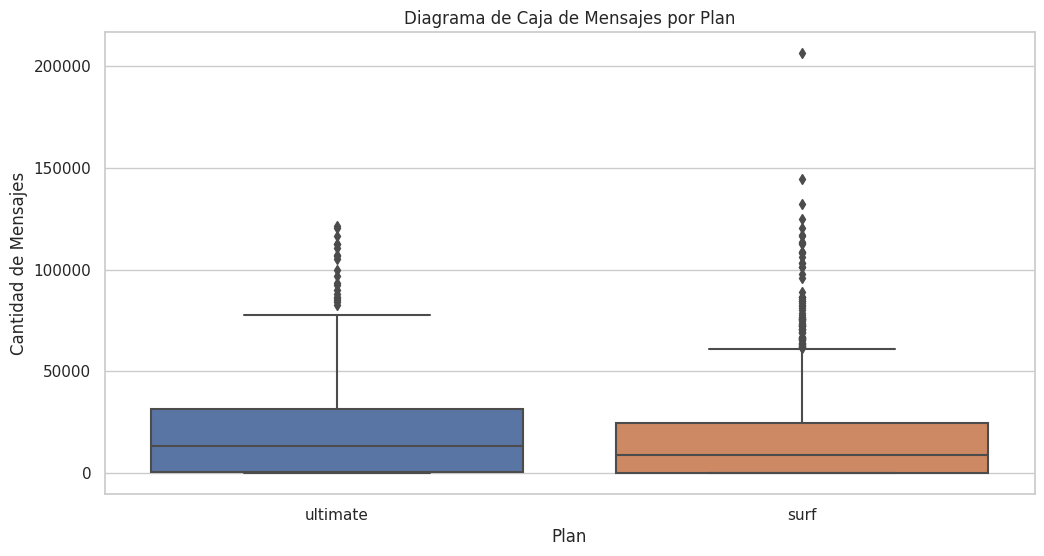

   plan_name    month  mean_messages  variance_messsages
0       surf  2018-01    1386.000000        3.841992e+06
1       surf  2018-02    4765.333333        9.149819e+07
2       surf  2018-03    7180.521739        1.373496e+08
3       surf  2018-04    7791.740000        1.314975e+08
4       surf  2018-05   13079.948052        3.997735e+08
5       surf  2018-06   12628.000000        3.141052e+08
6       surf  2018-07   14367.685950        3.500799e+08
7       surf  2018-08   15027.672840        3.744946e+08
8       surf  2018-09   15581.855670        3.914551e+08
9       surf  2018-10   18052.599156        5.299259e+08
10      surf  2018-11   16322.939929        3.948754e+08
11      surf  2018-12   21669.845912        6.952273e+08
12  ultimate  2018-01    3101.750000        1.758480e+07
13  ultimate  2018-02   11192.714286        2.187402e+08
14  ultimate  2018-03    9917.750000        1.800094e+08
15  ultimate  2018-04    7237.571429        8.743746e+07
16  ultimate  2018-05   18420.4

In [147]:
summary_stats = (
    summary_with_plans.groupby(['plan_name', 'month'])
    .agg(
        mean_messages=('messages_count', 'mean'),    # Media de minutos
        variance_messsages=('messages_count', 'var')  # Varianza de minutos
    )
    .reset_index()
)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(data=summary_with_plans, x='plan_name', y='messages_count')
plt.title('Diagrama de Caja de Mensajes por Plan')
plt.xlabel('Plan')
plt.ylabel('Cantidad de Mensajes')

plt.show()

print(summary_stats)

No handles with labels found to put in legend.


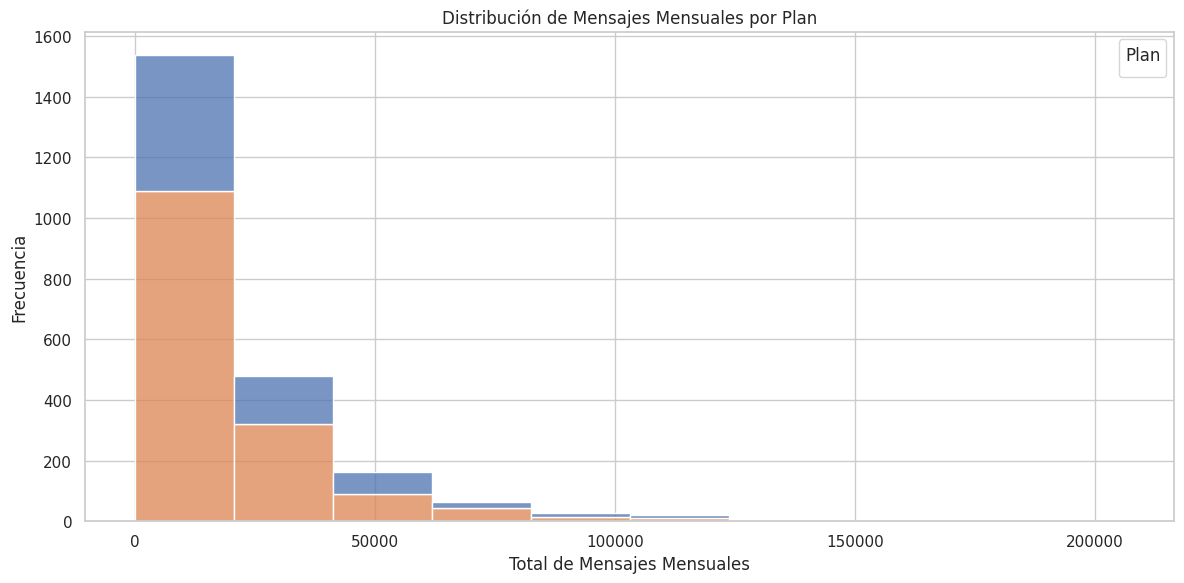

In [184]:
summary_with_plans['messages_count'] = summary_with_plans['messages_count'].fillna(0).astype(float)
total_minutes_by_user = (
    summary_with_plans.groupby(['user_id', 'month', 'plan_name'])
    .agg(total_minutes=('messages_count', 'sum'))
    .reset_index()
)

plt.figure(figsize=(12, 6))
sns.histplot(data=total_minutes_by_user, x='total_minutes', hue='plan_name', multiple='stack', bins=10)
plt.title('Distribución de Mensajes Mensuales por Plan')
plt.xlabel('Total de Mensajes Mensuales')
plt.ylabel('Frecuencia')
plt.legend(title='Plan')
plt.tight_layout()  


plt.show()

En general los usuarios de el plan "ultimate" utilizan en mayor proporcion el servicio de mensajeria 

### Internet

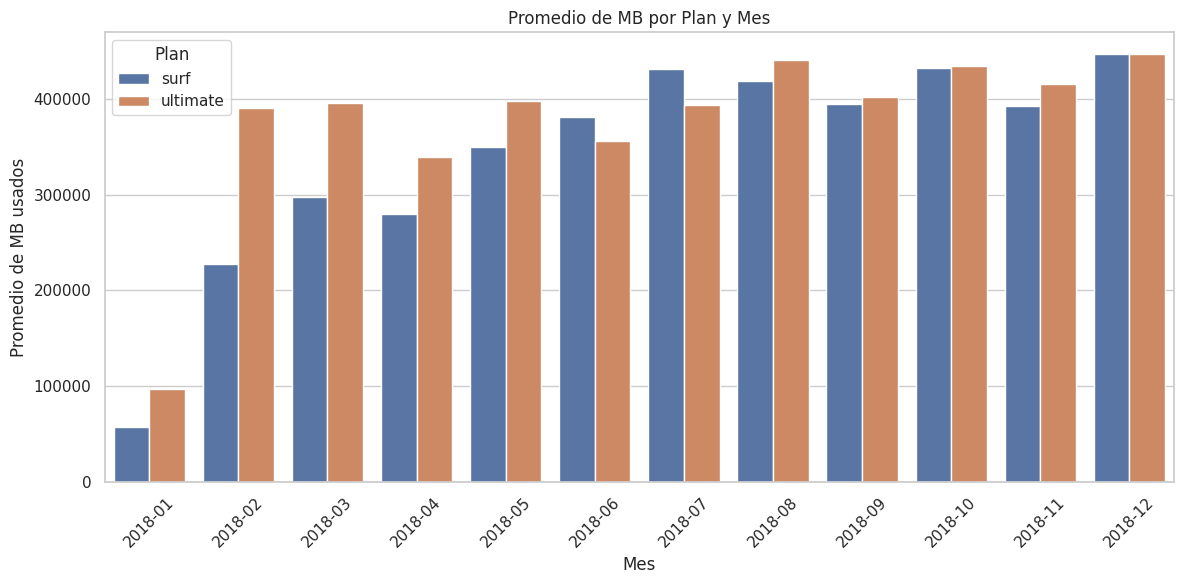

         id  user_id message_date    month
0  1000_125     1000   2018-12-27  2018-12
1  1000_160     1000   2018-12-31  2018-12
2  1000_223     1000   2018-12-31  2018-12
3  1000_251     1000   2018-12-27  2018-12
4  1000_255     1000   2018-12-26  2018-12


In [142]:

summary_with_plans['usage_mb'] = summary_with_plans['usage_mb'].fillna(0)
avg_internet = (
    summary_with_plans.groupby(['month', 'plan_name'])
    .agg(avg_messages=('usage_mb', 'mean'))
    .reset_index()
)
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_internet, x='month', y='avg_messages', hue='plan_name')
plt.title('Promedio de MB por Plan y Mes')
plt.xlabel('Mes')
plt.ylabel('Promedio de MB usados')
plt.xticks(rotation=45) 
plt.legend(title='Plan')
plt.tight_layout() 

plt.show()

No handles with labels found to put in legend.


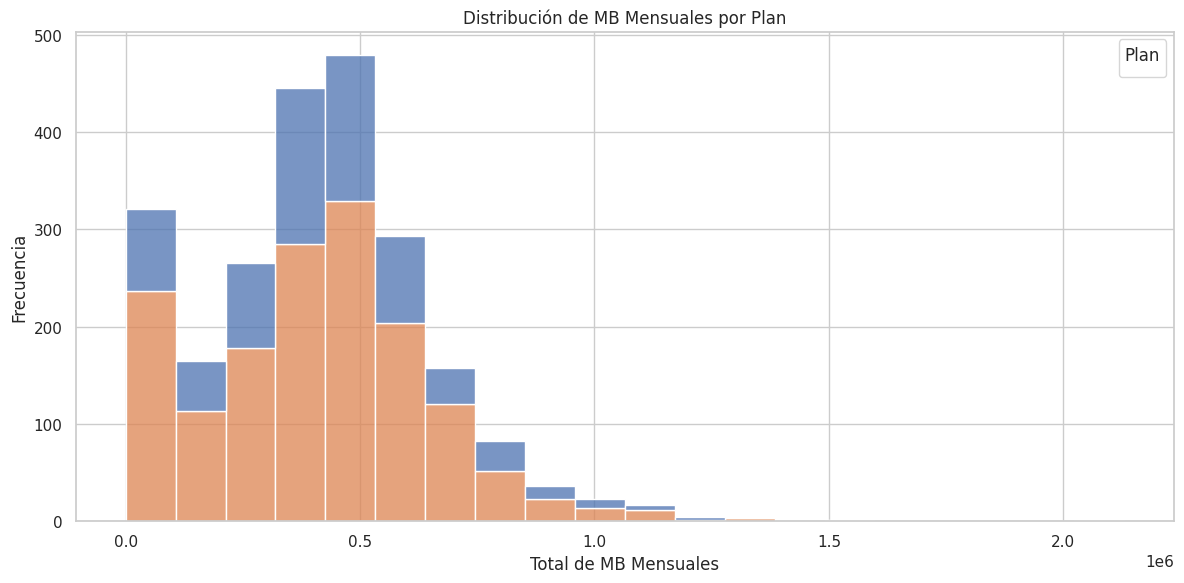

In [146]:
summary_with_plans['usage_mb'] = summary_with_plans['usage_mb'].fillna(0).astype(float)
total_minutes_by_user = (
    summary_with_plans.groupby(['user_id', 'month', 'plan_name'])
    .agg(total_minutes=('usage_mb', 'sum'))
    .reset_index()
)

plt.figure(figsize=(12, 6))
sns.histplot(data=total_minutes_by_user, x='total_minutes', hue='plan_name', multiple='stack', bins=20)
plt.title('Distribución de MB Mensuales por Plan')
plt.xlabel('Total de MB Mensuales')
plt.ylabel('Frecuencia')
plt.legend(title='Plan')
plt.tight_layout()  


plt.show()

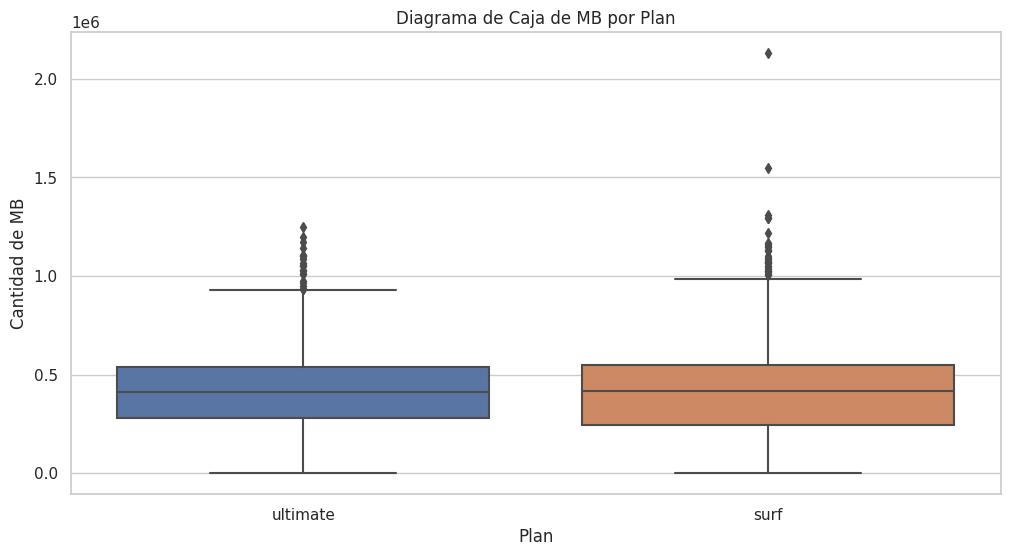

   plan_name    month  mean_messages  variance_messsages
0       surf  2018-01   57643.000000        2.768424e+09
1       surf  2018-02  227910.666667        1.813493e+10
2       surf  2018-03  297353.521739        4.963519e+10
3       surf  2018-04  280034.060000        5.367292e+10
4       surf  2018-05  349156.597403        6.159713e+10
5       surf  2018-06  380637.309278        4.963154e+10
6       surf  2018-07  431034.520661        6.523292e+10
7       surf  2018-08  418462.598765        7.000819e+10
8       surf  2018-09  394656.005155        4.734411e+10
9       surf  2018-10  431805.784810        6.412151e+10
10      surf  2018-11  392517.318021        5.001580e+10
11      surf  2018-12  446652.641509        6.393506e+10
12  ultimate  2018-01   96492.000000        6.175292e+09
13  ultimate  2018-02  390027.000000        6.303229e+10
14  ultimate  2018-03  395866.083333        1.271975e+11
15  ultimate  2018-04  339287.809524        6.622839e+10
16  ultimate  2018-05  398053.2

In [148]:
summary_stats = (
    summary_with_plans.groupby(['plan_name', 'month'])
    .agg(
        mean_messages=('usage_mb', 'mean'),    # Media de minutos
        variance_messsages=('usage_mb', 'var')  # Varianza de minutos
    )
    .reset_index()
)

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.boxplot(data=summary_with_plans, x='plan_name', y='usage_mb')
plt.title('Diagrama de Caja de MB por Plan')
plt.xlabel('Plan')
plt.ylabel('Cantidad de MB')

plt.show()

print(summary_stats)

Parece que, en general, se encuentran muy cercanos los consumos de ambos grupos en fechas recientes. La tendencia de los usuarios "ultimate" en el pasado tendía a usar un poco más de datos en algunos momentos.

## Ingreso

In [158]:
data = summary_with_plans[['plan_name', 'total_monthly_cost']]
stats_per_plan = data.groupby('plan_name')['total_monthly_cost'].describe()
print("Estadísticas Descriptivas de los Ingresos Mensuales por Plan:")
print(stats_per_plan)


Estadísticas Descriptivas de los Ingresos Mensuales por Plan:
            count         mean          std   min          25%          50%  \
plan_name                                                                     
surf       1573.0  4582.488059  2855.140488  20.0  2692.602950  4742.164169   
ultimate    720.0  2958.961306  1737.280106  70.0  1908.850948  2926.922171   

                   75%           max  
plan_name                             
surf       6202.568475  25138.238825  
ultimate   3872.563262   8843.864406  


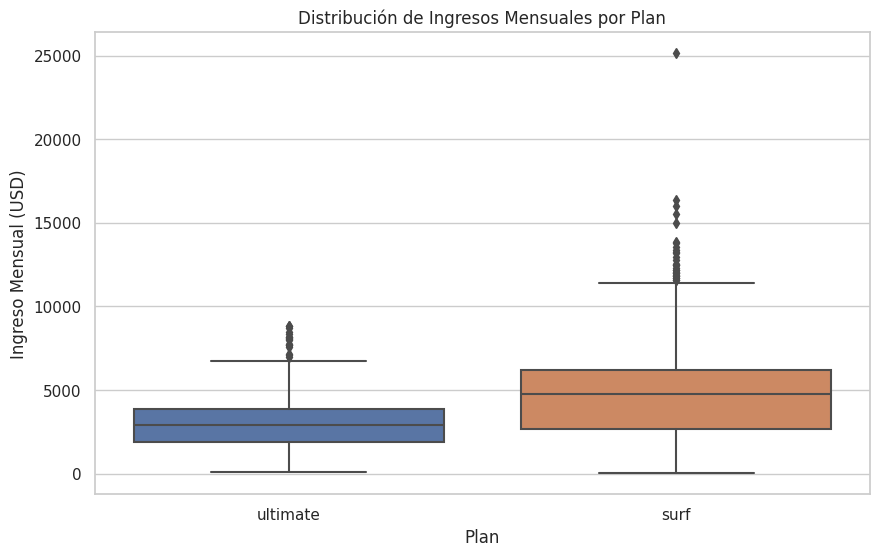

In [160]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=summary_with_plans, x='plan_name', y='total_monthly_cost')
plt.title('Distribución de Ingresos Mensuales por Plan')
plt.xlabel('Plan')
plt.ylabel('Ingreso Mensual (USD)')
plt.show()



Los servicios adicionales a los inclidos aumentan el ingreso que proporciona este plan 

## Prueba las hipótesis estadísticas

In [164]:
ultimate_income = summary_with_plans[summary_with_plans['plan_name'] == 'ultimate']['total_monthly_cost']
surf_income = summary_with_plans[summary_with_plans['plan_name'] == 'surf']['total_monthly_cost']
print(f"Ingreso medio - Ultimate: {ultimate_income.mean():.2f}")
print(f"Ingreso medio - Surf: {surf_income.mean():.2f}")
t_stat, p_value = stats.ttest_ind(ultimate_income, surf_income, equal_var=False)
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Los ingresos promedio son significativamente diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: No hay evidencia suficiente para afirmar que los ingresos promedio son diferentes.")



Ingreso medio - Ultimate: 2958.96
Ingreso medio - Surf: 4582.49
T-statistic: -16.7684
P-value: 0.0000
Rechazamos la hipótesis nula: Los ingresos promedio son significativamente diferentes.


In [177]:
ny_nj_income = summary_with_plans[
    summary_with_plans['city'].str.contains('New York|Jersey', case=False, na=False)
]['usd_monthly_pay']

other_regions_income = summary_with_plans[
    ~summary_with_plans['city'].str.contains('New York|Jersey', case=False, na=False)
]['usd_monthly_pay']
print(f"Ingreso medio - NY-NJ: {ny_nj_income.mean():.2f}")
print(f"Ingreso medio - Otras regiones: {other_regions_income.mean():.2f}")
t_stat, p_value = stats.ttest_ind(ny_nj_income, other_regions_income, equal_var=False)
print(f"\nT-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
alpha = 0.05  # Nivel de significancia
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Los ingresos promedio son significativamente diferentes.")
else:
    print("No podemos rechazar la hipótesis nula: No hay evidencia suficiente para afirmar que los ingresos promedio son diferentes.")


Ingreso medio - NY-NJ: 28.62
Ingreso medio - Otras regiones: 37.09

T-statistic: -7.6008
P-value: 0.0000
Rechazamos la hipótesis nula: Los ingresos promedio son significativamente diferentes.


## Conclusión general
Podemos concluir que el plan que generará mayores ingresos para la empresa será el "sturf". A lo largo del proyecto, hemos observado que los consumos de ambos grupos están muy cercanos en fechas recientes. Sin embargo, es interesante notar que, en el pasado, los usuarios del plan "ultimate" tendían a utilizar un poco más de datos en ciertos momentos, lo que sugiere que hay oportunidades para optimizar ambos planes.

La forma en que se redondean los valores y los patrones de consumo de los usuarios del plan "sturf" están evolucionando y, según nuestras proyecciones, tenderán a igualarse con los usuarios que prefieren el pago de "ultimate". Esto indica que los consumidores están interesados en las características y beneficios que ofrece el plan "sturf", lo cual es una señal positiva para su adopción.

Uno de los factores más significativos que influye en la elección de los usuarios es el pago fijo mensual. Este modelo proporciona una previsibilidad financiera que muchos consumidores valoran, ya que les permite planificar su presupuesto sin sorpresas. Además, los beneficios adicionales que el plan "sturf" proporciona son atractivos y fomentan el uso de servicios complementarios. Este uso adicional de servicios puede no solo satisfacer mejor las necesidades de los usuarios, sino que también puede ayudar a la empresa a superar los ingresos generados por el plan "ultimate".

Dado este análisis, recomendaría que el departamento de mercadotecnia, mencionado al inicio de este proyecto, concentre sus esfuerzos en promover el plan "sturf". La estrategia de marketing podría enfocarse en resaltar los beneficios del pago fijo y la experiencia positiva de los usuarios actuales del plan. Implementar campañas de publicidad que destaquen testimonios de clientes satisfechos también podría ser una excelente forma de atraer nuevos usuarios.

Además, sería beneficioso realizar un seguimiento continuo de los patrones de consumo de ambos grupos para ajustar nuestras estrategias y mejorar constantemente la propuesta de valor de ambos planes. Al hacerlo, no solo maximizaremos los ingresos de la empresa, sino que también mejoraremos la satisfacción del cliente, lo que a largo plazo puede resultar en una mayor fidelización y en el crecimiento sostenible de la empresa.

